# Case Study #3: Foodie-Fi
The case study questions presented here are created by [**Data With Danny**](https://linktr.ee/datawithdanny). They are part of the [**8 WeekSQL Challenge**](https://8weeksqlchallenge.com/).

My SQL queries are written in the `MySQL` language, integrated into `Jupyter Notebook`, which allows us to instantly view the query results and document the queries.

For more details about the **Case Study #3**, click [**here**](https://8weeksqlchallenge.com/case-study-3/).

## Table of Contents
___
### [1. Importing Libraries](#Import)
### [2. Tables of the Database](#Tables)
### [3. Case Study Questions](#CaseStudyQuestions)

- [A. Customer Journey](#A)
- [B. Data Analysis Questions](#B)
- [C. Challenge Payment Question](#C)

___
<a id="Import"></a>
## 1. Importing required libraries 

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams.update({'text.color' : "Green",
                     'axes.labelcolor' : "Green"})

___
<a id="Tables"></a>
## 2. Tables of the Database

### Connecting MySQL database from Jupyter Notebook

In [2]:
password = os.getenv("MYSQL_PASSWORD")

conn = pymysql.connect(host = "localhost", user = "root", passwd = password, db = "foodie_fi")
mycursor = conn.cursor()

mycursor.execute("SHOW TABLES;")
print('--- Tables within "foodie_di" database --- ')
for table in mycursor:
    print(table[0])

--- Tables within "foodie_di" database --- 
plans
subscriptions


The followings are the 2 tables within the `foodie_fi` database. Please click [here](https://8weeksqlchallenge.com/case-study-3/) to get more insights about the tables.

In [3]:
mycursor.execute("SHOW TABLES;")
for table in mycursor:
    print("Table: ", table[0])
    query = "SELECT * FROM " + table[0]
    df = pd.read_sql(query, conn)
    display(df)

Table:  plans


,plan_id,plan_name,price
0,0,trial,0.0
1,1,basic monthly,9.9
2,2,pro monthly,19.9
3,3,pro annual,199.0
4,4,churn,NaN


Table:  subscriptions


,customer_id,plan_id,start_date
0,1,0,2020-08-01
1,1,1,2020-08-08
2,2,0,2020-09-20
3,2,3,2020-09-27
4,3,0,2020-01-13
...,...,...,...
2645,999,2,2020-10-30
2646,999,4,2020-12-01
2647,1000,0,2020-03-19
2648,1000,2,2020-03-26


___
<a id="CaseStudyQuestions"></a>
## 3. Case Study Questions

<a id="A"></a>
## A. Customer Journey

Based off the 8 sample customers provided in the sample from the subscriptions table, write a brief description about each customer’s onboarding journey.\
Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

In [4]:
pd.read_sql("""
SELECT 
    s.customer_id, 
    p.plan_name, 
    p.price,
    s.start_date
FROM foodie_fi.subscriptions s
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE s.customer_id IN (1, 2, 11, 13, 15, 16, 18, 19)
""", conn)

,customer_id,plan_name,price,start_date
0,1,trial,0.0,2020-08-01
1,1,basic monthly,9.9,2020-08-08
2,2,trial,0.0,2020-09-20
3,2,pro annual,199.0,2020-09-27
4,11,trial,0.0,2020-11-19
5,11,churn,NaN,2020-11-26
6,13,trial,0.0,2020-12-15
7,13,basic monthly,9.9,2020-12-22
8,13,pro monthly,19.9,2021-03-29
9,15,trial,0.0,2020-03-17


**Result**
- **`Customer 1`** joined Foodie-Fi on 2020-08-01 for a free trial and subscribed to the basic monthly plan on 2020-08-08, at the end of the 7-day free trial, with a fee of \$9.90.


- **`Customer 2`** joined Foodie-Fi on 2020-09-20 for a free trial and subscribed to the pro annual plan on 2020-09-27, at the end of the 7-day free trial, with a fee of \$199.00.


- **`Customer 11`** joined Foodie-Fi on 2020-11-19 for a free trial and cancelled the service on 2020-11-26 rigth after the end of the 7-day free trial.


- **`Customer 13`** joined Foodie-Fi on 2020-12-15 for a free trial, subscribed to the basic monthly plan on 2020-12-22, at the end of the 7-day free trial, with a fee of \\$9.90, and upgraded to a pro monthly plan on 2021-03-29 for a price of \\$19.90.


- **`Customer 15`** joined Foodie-Fi on 2020-03-17 for a free trial, subscribed to the pro monthly plan on 2020-03-24, at the end of the 7-day free trial, with a fee of \$19.90, and then cancelled the service on 2020-04-29 (after a month).


- **`Customer 16`** joined Foodie-Fi on 2020-05-31 for a free trial, subscribed to the basic monthly plan on 2020-06-07, at the end of the 7-day free trial, with a fee of \$9.90, and then upgraded to a pro annual plan on 2020-10-21 (after 4 months).


- **`Customer 18`** joined Foodie-Fi on 2020-07-06 for a free trial and subscribed to the pro monthly plan on 2020-07-13, at the end of the 7-day free trial, with a fee of \$19.90.


- **`Customer 19`** joined Foodie-Fi on 2020-06-22 for a free trial, subscribed to the pro monthly plan on 2020-06-29, at the end of the 7-day free trial, with a fee of \\$19.90, and then upgraded to a pro annual plan on 2020-08-29 for a price of \\$199.00 (after 2 months).

___
<a id="B"></a>
## B. Data Analysis Questions 

#### 1.How many customers has Foodie-Fi ever had?

In [5]:
pd.read_sql("""
SELECT COUNT(DISTINCT customer_id) AS nb_customers
FROM foodie_fi.subscriptions
""", conn)

,nb_customers
0,1000


**Result**\
Foodie-Fi had 1000 customers.

___
#### 2.What is the monthly distribution of trial plan `start_date` values for our dataset - use the start of the month as the group by value.

In [6]:
df2 = pd.read_sql("""
SELECT 
    MONTH(s.start_date) AS month, 
    MONTHNAME(s.start_date) AS month_name,
    COUNT(*) AS nb_trial
FROM foodie_fi.subscriptions s
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE p.plan_name = "trial"
GROUP BY month, month_name
ORDER BY month
""", conn)
df2

,month,month_name,nb_trial
0,1,January,88
1,2,February,68
2,3,March,94
3,4,April,81
4,5,May,88
5,6,June,79
6,7,July,89
7,8,August,88
8,9,September,87
9,10,October,79


**Result**

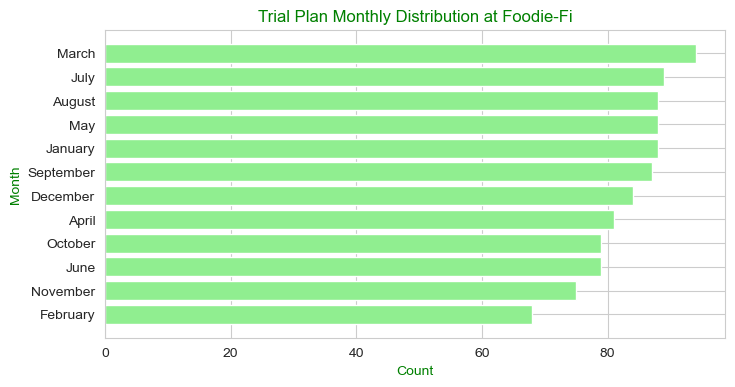

In [7]:
df2.sort_values(by = "nb_trial", ascending= True, inplace = True)

fig, ax = plt.subplots(figsize = (8,4))
ax.barh(df2.month_name, df2.nb_trial, color = 'lightgreen')
ax.set(title = 'Trial Plan Monthly Distribution at Foodie-Fi', xlabel = 'Count', ylabel = 'Month');

**Result**\
Based on the plotted bar graph of the SQL query results, the following observations can be made:
- The month with the highest number of new customers subscribing to the trial plan is `March`, with a total of 94 new subscriptions.
- Following March, the months of `July`, `August`, `May`, `January`, `September`, `December`, and `April` have descending order averages ranging from 81 to 89 subscriptions.
- The months of `October`, `June`, and `November` have an average number of new customers between 75 and 79.
- The month of `February` is the least popular for new customers to try the Foodie-Fi service.

___
#### 3.What plan `start_date` values occur *after the year 2020* for our dataset? Show the breakdown by count of events for each `plan_name`.

In [8]:
df3 = pd.read_sql("""
SELECT 
    p.plan_name, 
    COUNT(p.plan_name) AS count
FROM foodie_fi.subscriptions s
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE YEAR(s.start_date) >= 2021
GROUP BY p.plan_name;
""", conn)
df3

,plan_name,count
0,churn,71
1,pro monthly,60
2,pro annual,63
3,basic monthly,8


**Result**

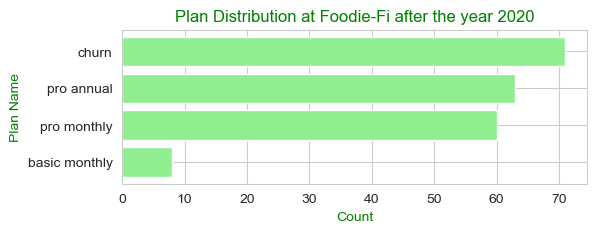

In [9]:
df3.sort_values(by = "count", ascending= True, inplace = True)

fig, ax = plt.subplots(figsize = (6,2))
ax.barh(df3.plan_name,df3['count'], color = 'lightgreen')
ax.set(title = 'Plan Distribution at Foodie-Fi after the year 2020', xlabel = 'Count', ylabel = 'Plan Name');

Based on the plotted bar graph of the SQL query results, the following observations can be made:

- The number of customers who have `churned` the Foodie-Fi service is higher, with a total of 71 customers after the year 2020.
- Out of the customers, 63 have a `Pro Annual` plan, while 60 have a `Pro Monthly` plan.
- In contrast, only 8 customers have subscribed to the `Basic Monthly` plan.

___
#### 4.What is the customer count and percentage of customers who have churned rounded to 1 decimal place?

In [10]:
pd.read_sql("""
WITH churn_cte AS
(
    SELECT 
        COUNT(s.customer_id) AS churn_count
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name = "churn"
)
SELECT 
    churn_count, 
    COUNT(DISTINCT s.customer_id) AS total_customers,
    CONCAT(ROUND(churn_count/COUNT(DISTINCT s.customer_id) * 100, 1), " %") AS percentage
FROM churn_cte, foodie_fi.subscriptions s
GROUP BY 1;
""", conn)

,churn_count,total_customers,percentage
0,307,1000,30.7 %


**Result**\
There are 307 customers (or 30.7 % of the Foodie-Fi customers) who have churned.

___
#### 5.How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?

In [11]:
pd.read_sql("""
WITH postplans_cte AS
(
    SELECT 
        s.customer_id, 
        p.plan_name,  
        LEAD(p.plan_name) OVER (PARTITION BY s.customer_id ORDER BY s.plan_id) AS post_trial_plan
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
)
SELECT 
    COUNT(DISTINCT pp.customer_id) AS posttrial_churned_count, 
    COUNT(DISTINCT s.customer_id) AS total_customers, 
    CONCAT(ROUND(COUNT(DISTINCT pp.customer_id)/COUNT(DISTINCT s.customer_id) * 100, 0), " %") AS percentage
FROM postplans_cte pp, foodie_fi.subscriptions s
WHERE pp.plan_name = "trial" AND pp.post_trial_plan = "churn";
""", conn)

,posttrial_churned_count,total_customers,percentage
0,92,1000,9 %


**Result**\
There are 92 customers (or 9 % of the Foodie-Fi customers) who have churned straight after their initial free trial.

___
#### 6.What is the number and percentage of customer plans after their initial free trial?

In [12]:
query6 = """
WITH postplans_cte AS
(
    SELECT 
        s.customer_id, 
        p.plan_name,
        LEAD(p.plan_name) OVER (PARTITION BY s.customer_id ORDER BY s.plan_id) AS post_trial_plan
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
),
total_customers_cte AS
(
    SELECT 
        COUNT(DISTINCT customer_id) AS total_customers
    FROM foodie_fi.subscriptions
)
SELECT 
    post_trial_plan, 
    COUNT(post_trial_plan) AS plan_count,
    CONCAT(ROUND(COUNT(post_trial_plan)/MAX(total_customers)*100, 1), ' %') AS percentage
FROM postplans_cte, total_customers_cte
WHERE plan_name = 'trial'
GROUP BY post_trial_plan
ORDER BY plan_count DESC;
"""

df6 = pd.read_sql(query6, conn)
df6

,post_trial_plan,plan_count,percentage
0,basic monthly,546,54.6 %
1,pro monthly,325,32.5 %
2,churn,92,9.2 %
3,pro annual,37,3.7 %


**Result**

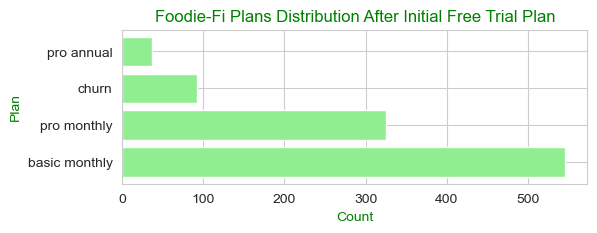

In [13]:
fig, ax = plt.subplots(figsize = (6,2))
ax.barh(df6.post_trial_plan, df6.plan_count, color = 'lightgreen')
ax.set(title = 'Foodie-Fi Plans Distribution After Initial Free Trial Plan', xlabel = 'Count', ylabel = 'Plan');

- The `Basic Monthly` plan is the most popular one at Foodie-Fi after the 7-day free `trial` plan, with a total of 546 subscriptions, representing 54.6% of the Foodie-Fi customers (half of the customers).
- The `Pro Monthly` plan is the second most popular choice among customers, with a total of 325 subscriptions, accounting for 32.5% of the customers.
- There are 9.2% of customers who have cancelled the service (see `Churn` plan)
- As for the `Pro Annual` plan, only 37 customers, or 3.7% of the Foodie-Fi customers, have opted for this plan.

___
#### 7.What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?

In [14]:
query7 = """ 
WITH latest_plans_cte AS
(
    SELECT 
        s.customer_id, 
        s.plan_id, 
        p.plan_name, 
        s.start_date, 
        DENSE_RANK() OVER (PARTITION BY s.customer_id ORDER BY s.start_date DESC) AS rk
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE s.start_date <= '2020-12-31'
),
total_customers_cte AS
(
    SELECT 
        COUNT(DISTINCT customer_id) AS total_customers
    FROM foodie_fi.subscriptions
)
SELECT 
    plan_name, 
    COUNT(plan_name) AS count,
    CONCAT(ROUND(COUNT(plan_name) / MAX(total_customers) * 100, 1), ' %') AS percentage
FROM latest_plans_cte, total_customers_cte
WHERE rk = 1
GROUP BY plan_name
ORDER BY count DESC;
"""

df7 = pd.read_sql(query7, conn)
df7

,plan_name,count,percentage
0,pro monthly,326,32.6 %
1,churn,236,23.6 %
2,basic monthly,224,22.4 %
3,pro annual,195,19.5 %
4,trial,19,1.9 %


**Result**

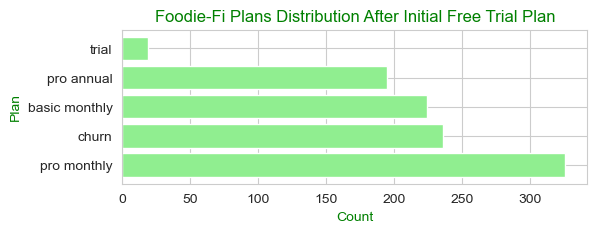

In [15]:
fig, ax = plt.subplots(figsize = (6,2))
ax.barh(df7['plan_name'], df7['count'], color = 'lightgreen')
ax.set(title = 'Foodie-Fi Plans Distribution After Initial Free Trial Plan', xlabel = 'Count', ylabel = 'Plan');

Here is the subscription distribution report for the plans at Foodie-Fi as of December 31, 2020:
- The `Pro Monthly` plan is the most popular one at Foodie-Fi, with a total of 326 subscriptions, representing 32.6% of the customers.
- It is followed by the `Churn` and `Basic Monthly` plans, with a total of 236 and 224 subscriptions, respectively. This corresponds to 23.6% and 22.4% of Foodie-Fi customers, respectively.
- There are 195 customers, which accounts for 19.5% of the total customers, who upgraded to the `Pro Annual` plan.
- As for the `Trial` plan, only 19 customers, or 1.9% of the total customers, opted for this plan.

___
#### 8.How many customers have upgraded to an annual plan in 2020?

In [16]:
pd.read_sql("""
SELECT 
    p.plan_name, 
    COUNT(*) AS count
FROM foodie_fi.subscriptions s
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE YEAR(s.start_date) = 2020 AND p.plan_name = "pro annual"
""", conn)

,plan_name,count
0,pro annual,195


**Result**\
In 2020, there were 195 Foodie-Fi customers who upgraded to `annual plan`.

___
#### 9.How many days on average does it take for a customer to an `annual plan` from the day they join Foodie-Fi?

In [17]:
pd.read_sql("""
WITH customers_annualplan_cte AS
(
    -- retrieve customer IDs of those subscribed to the "pro annual" plan
    
    SELECT s.customer_id
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name = 'pro annual' 
)

 -- retrieve start dates for 'trial' and 'pro annual' for each customer 

SELECT 
    cte.customer_id, 
    p.plan_name, 
    s.start_date AS join_date, 
    LEAD(s.start_date) OVER (PARTITION BY s.customer_id ORDER BY s.start_date) AS updated_date
FROM customers_annualplan_cte cte
JOIN foodie_fi.subscriptions s ON cte.customer_id = s.customer_id
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE p.plan_name IN ('trial','pro annual') 
""", conn)

,customer_id,plan_name,join_date,updated_date
0,2,trial,2020-09-20,2020-09-27
1,2,pro annual,2020-09-27,None
2,9,trial,2020-12-07,2020-12-14
3,9,pro annual,2020-12-14,None
4,16,trial,2020-05-31,2020-10-21
...,...,...,...,...
511,976,pro annual,2021-02-13,None
512,978,trial,2020-08-27,2020-11-03
513,978,pro annual,2020-11-03,None
514,989,trial,2020-09-03,2021-01-10


In [18]:
pd.read_sql("""
WITH customers_annualplan_cte AS
(
    -- retrieve customer IDs of those subscribed to the "pro annual" plan
    
    SELECT s.customer_id
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name = 'pro annual' 
),
subscription_dates_cte AS
(
    -- retrieve start dates for 'trial' and 'pro annual' for each customer 
    
    SELECT 
        cte.customer_id, 
        p.plan_name, 
        s.start_date AS join_date, 
        LEAD(s.start_date) OVER (PARTITION BY s.customer_id ORDER BY s.start_date) AS updated_date
    FROM customers_annualplan_cte cte
    JOIN foodie_fi.subscriptions s ON cte.customer_id = s.customer_id
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name IN ('trial','pro annual') 
)
SELECT 
    ROUND(AVG(TIMESTAMPDIFF(DAY, join_date, updated_date)), 1) AS avg_days
FROM subscription_dates_cte
""", conn)

,avg_days
0,104.6


**Result**\
The average number of days that it took for Foodie-Fi customers to upgrade to an `annual plan` is 104.5 days.

___
#### 10.Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)

In [19]:
# Drop the Temporary Table (if it exists)
mycursor.execute("DROP TEMPORARY TABLE IF EXISTS NbDays_to_ProAnnual;")

# Write the query
query10 = """
WITH customers_annualplan_cte AS
(
    -- retrieve customer IDs of those subscribed to the "pro annual" plan
    
    SELECT s.customer_id
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name = 'pro annual' 
),

subscription_dates_cte AS
(
    -- retrieve start dates for 'trial' and 'pro annual' for each customer 
    
    SELECT 
        cte.customer_id, 
        s.start_date AS join_date, 
        LEAD(s.start_date) OVER (PARTITION BY s.customer_id ORDER BY s.start_date) AS updated_date,
        TIMESTAMPDIFF(DAY, s.start_date, LEAD(s.start_date) OVER (PARTITION BY s.customer_id ORDER BY s.start_date)) AS num_days
    FROM customers_annualplan_cte cte
    JOIN foodie_fi.subscriptions s ON cte.customer_id = s.customer_id
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name IN ('trial','pro annual') 
)
SELECT *
FROM subscription_dates_cte;
"""

# Create and Save Temporary Table
mycursor.execute("CREATE TEMPORARY TABLE NbDays_to_ProAnnual AS " + query10.replace(';', ''))
conn.commit()

# Display the table
pd.read_sql(query10, conn)

,customer_id,join_date,updated_date,num_days
0,2,2020-09-20,2020-09-27,7.0
1,2,2020-09-27,None,NaN
2,9,2020-12-07,2020-12-14,7.0
3,9,2020-12-14,None,NaN
4,16,2020-05-31,2020-10-21,143.0
...,...,...,...,...
511,976,2021-02-13,None,NaN
512,978,2020-08-27,2020-11-03,68.0
513,978,2020-11-03,None,NaN
514,989,2020-09-03,2021-01-10,129.0


**Result**

In [20]:
query10 = """
WITH periods_cte AS 
(
    -- create a column for the 30 day periods 
    SELECT 
        customer_id, 
        num_days,
        CONCAT(
            CAST(FLOOR((num_days - 1)/30) * 30 + 1 AS CHAR), '-',
            CAST(FLOOR((num_days - 1)/30 + 1) * 30 AS CHAR), ' days'
        ) AS periods
    FROM NbDays_to_ProAnnual
    HAVING num_days IS NOT NULL
)
SELECT 
    periods, 
    COUNT(customer_id) AS nb_customers, 
    ROUND(AVG(num_days), 2)AS avg_days
FROM periods_cte
GROUP BY periods
ORDER BY CAST(SUBSTRING_INDEX(periods, '-', 1) AS UNSIGNED);
"""

df10 = pd.read_sql(query10, conn)
df10

,periods,nb_customers,avg_days
0,1-30 days,49,9.96
1,31-60 days,24,42.33
2,61-90 days,34,71.44
3,91-120 days,35,100.69
4,121-150 days,42,133.36
5,151-180 days,36,162.06
6,181-210 days,26,190.73
7,211-240 days,4,224.25
8,241-270 days,5,257.20
9,271-300 days,1,285.00


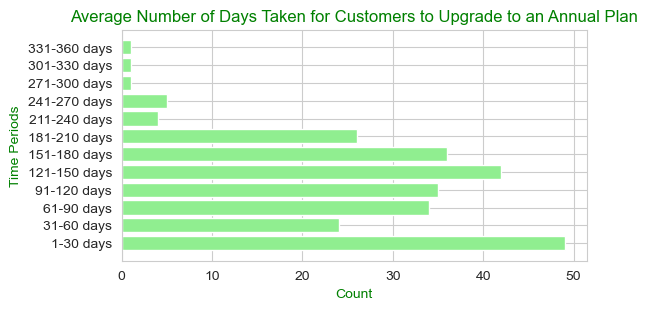

In [21]:
fig, ax = plt.subplots(figsize = (6,3))
ax.barh(df10.periods,df10['nb_customers'], color = 'lightgreen')
ax.set(title = 'Average Number of Days Taken for Customers to Upgrade to an Annual Plan', 
       xlabel = 'Count', 
       ylabel = 'Time Periods');

In [22]:
mycursor.execute("DROP TEMPORARY TABLE IF EXISTS NbDays_to_ProAnnual;")
conn.commit()

___
#### 11.How many customers downgraded from a `pro monthly` to a `basic monthly` plan in 2020?

In [23]:
pd.read_sql("""
WITH cte AS (
    SELECT 
        s.customer_id, 
        s.start_date, 
        p.plan_name, 
        LEAD(p.plan_name) OVER (PARTITION BY s.customer_id ORDER BY s.start_date) AS updated_plan
    FROM foodie_fi.subscriptions s
    JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE YEAR(s.start_date) = 2020
)
SELECT COUNT(*) AS downgraded_count
FROM cte
WHERE plan_name = 'pro monthly' AND updated_plan = 'basic monthly';
""", conn)

,downgraded_count
0,0


**Result**\
There is no customer that downgraded from a `pro monthly` to a `basic monthly` plan in 2020 at Foodie-Fi.

___
<a id="C"></a>
## C. Challenge Payment Question 

The Foodie-Fi team wants you to create a new payments table for the **year 2020** that includes amounts paid by each customer in the subscriptions table with the following requirements:
- monthly payments always occur on the **same day of month as the original `start_date`** of any monthly paid plan
- upgrades from `basic to monthly` or `pro plans` are reduced by the current paid amount in that month and start immediately
- upgrades from `pro monthly` to `pro annual` are paid at the end of the current billing period and also starts at the end of the month period
- once a customer churns they will no longer make payments

### Strategies:
- In **PostgreSQL**, the `generate_series` function can be utilized to create a series of numbers or dates within a specified range.
- Therefore, in order to achieve this result with **MySQL**, we will create subqueries with `CROSS JOIN` and `UNION`.
1. Generate a series of monthly payment dates for each plan and customer.
2. Retrieve the payments until the end of year 2020 OR until the start date of the `pro annual` plan.
3. Sort the payments by customer IDs in ascending order.
4. Adjust the payment amounts for customers who have upgraded their plans from basic to pro.
5. Create a table for the new payment system.

### STEP 1: Generate a series of monthly payment dates for each customer.
As we observe in the initial datasets (see query below), the `start_date` of each plan is displayed *only once* for each respective month. However, our desired outcome is to generate a sequence of monthly payment dates for each plan and customer until the end of 2020.<br>
For instance, if **customer 1** subscribed to the `basic monthly` plan on 2020-08-08, we should display the same plan name for each month until 2020-12-08 (from august until december).

In [24]:
pd.read_sql("""
SELECT 
    s.customer_id, 
    s.plan_id, 
    p.plan_name, 
    s.start_date, p.price
FROM foodie_fi.subscriptions s
JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
WHERE p.plan_name != 'trial' 
""", conn)

,customer_id,plan_id,plan_name,start_date,price
0,1,1,basic monthly,2020-08-08,9.9
1,2,3,pro annual,2020-09-27,199.0
2,3,1,basic monthly,2020-01-20,9.9
3,4,1,basic monthly,2020-01-24,9.9
4,4,4,churn,2020-04-21,NaN
...,...,...,...,...,...
1645,998,2,pro monthly,2020-10-19,19.9
1646,999,2,pro monthly,2020-10-30,19.9
1647,999,4,churn,2020-12-01,NaN
1648,1000,2,pro monthly,2020-03-26,19.9


Now, in the following query, let's generate a **serie of monthly dates** for each `customer_id` starting from their respective `start_date` and continuing until the end of the year 2020.

In [25]:
query_generate_dates = """
SELECT 
    customer_id, 
    plan_id, 
    plan_name, 
    DATE_ADD(start_date, INTERVAL t.n MONTH) AS start_date,
    price
FROM 
    (
        -- Join Initial Datasets
        SELECT s.customer_id, s.plan_id, p.plan_name, s.start_date, p.price
        FROM foodie_fi.subscriptions s
        JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
        WHERE p.plan_name != 'trial' 
    ) i
CROSS JOIN (
        SELECT 0 AS n UNION ALL SELECT 1 UNION ALL SELECT 2 UNION ALL SELECT 3 UNION ALL SELECT 4 UNION ALL
        SELECT 5 UNION ALL SELECT 6 UNION ALL SELECT 7 UNION ALL SELECT 8 UNION ALL SELECT 9 UNION ALL
        SELECT 10 UNION ALL SELECT 11
    ) t
WHERE (plan_name != 'churn' AND YEAR(DATE_ADD(start_date, INTERVAL t.n MONTH)) < 2021) 
ORDER BY customer_id, start_date

"""
pd.read_sql(query_generate_dates, conn)

,customer_id,plan_id,plan_name,start_date,price
0,1,1,basic monthly,2020-08-08,9.9
1,1,1,basic monthly,2020-09-08,9.9
2,1,1,basic monthly,2020-10-08,9.9
3,1,1,basic monthly,2020-11-08,9.9
4,1,1,basic monthly,2020-12-08,9.9
...,...,...,...,...,...
7239,1000,2,pro monthly,2020-08-26,19.9
7240,1000,2,pro monthly,2020-09-26,19.9
7241,1000,2,pro monthly,2020-10-26,19.9
7242,1000,2,pro monthly,2020-11-26,19.9


### STEP 2: Retrieve the payments until the end of year 2020 OR until the start date of the pro annual plan.
Please note that in the previous step, the series of monthly payment dates was automatically generated for each subscribed plan and customer until the end of the year 2020. However, it is important to understand that once a customer upgrades to the `pro annual` plan, only one fee will be charged for the remainder of the year, starting from the respective start date of the changed plan. In other words, in the final table, there should not be any instances of multiple monthly payments beyond the start date of the pro annual. The table presented below is a potential output from the previous step.

**Table 1**: Query Result Obtained in Step 1 with Pro Annual Upgrade

customer_id | plan_id | plan_name | start_date | price
-- | -- | -- | -- | -- |
A | 1 | basic monthly | 2020-01-03 | 9.90
A | 1 | basic monthly | 2020-02-03 | 9.90
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**
A | 1 | basic monthly | 2020-04-03 | 9.90
A | 1 | basic monthly | 2020-05-03 | 9.90
A | 1 | basic monthly | 2020-06-03 | 9.90

OR 


customer_id | plan_id | plan_name | start_date | price
-- | -- | -- | -- | -- |
A | 1 | basic monthly | 2020-01-03 | 9.90
A | 1 | basic monthly | 2020-02-03 | 9.90
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**


**Table 2**: Desired Query Result with Pro Annual Upgrade to achieve in STEP 2

customer_id | plan_id | plan_name | start_date | price
-- | -- | -- | -- | -- |
A | 1 | basic monthly | 2020-01-03 | 9.90
A | 1 | basic monthly | 2020-02-03 | 9.90
**A** | **3** | **pro annual** | **2020-03-03** | **199.00**


**Query explanation for STEP 2**

1. The **`addHelperVariables_cte`** has been introduced with 3 additional columns using **Window Functions** (LEAD, LAG, and DENSE_RANK) to facilitate the analysis:

    - `prev_price` column retrieves the plan price of the previous month from the previous row using the `LAG` function. This column allows for later adjustment of the amount for customers who have upgraded their plans from basic to pro.

    - `next_payment_date` column retrieves the next payment date from the row below using the `LEAD` function. This column allows us to remove multiple monthly payments beyond the start date of the pro annual plan.

    - `pro_annual_rk` column ranks the occurrence of the pro annual plan using the `DENSE_RANK` function. This column allows us to select the initial start date of the upgrade plan to an annual plan.


2. The **`joinAllPlans_cte`** is used to remove all instances of multiple monthly payments beyond the start date of the pro annual plan using `UNION ALL`.

In [26]:
query_ranking = """
WITH addHelperVariables_cte AS
(
    -- This CTE introduces additional columns to facilitate the analysis
    SELECT 
        customer_id, plan_id, plan_name, start_date, price,
        LAG(price) OVER (PARTITION BY customer_id ORDER BY start_date) AS prev_price,
        LEAD(start_date) OVER (PARTITION BY customer_id ORDER BY start_date) AS next_payment_date,
        CASE WHEN plan_name = 'pro annual'
            THEN DENSE_RANK() OVER (PARTITION BY customer_id, plan_name ORDER BY start_date)
        END AS pro_annual_rk
    FROM ({}) AS query_generate_dates
),
joinAllPlans_cte AS
(
    -- This CTE combines all plans until the end of year 2020 or until the start date of the "pro annual" plan.
    
    
    -- This first SELECT query retrives all plans except "pro annual" plan
    -- until the end of year 2020 or until the start date of the "pro annual" plan.
    SELECT customer_id, plan_id, plan_name, start_date, price, prev_price
    FROM 
    (
        SELECT customer_id, plan_id, plan_name, start_date, price, prev_price, next_payment_date,
        TIMESTAMPDIFF(MONTH, start_date, next_payment_date) AS diff_date
        FROM addHelperVariables_cte
        WHERE plan_name != 'pro annual'
    ) t
    WHERE diff_date = 1 OR diff_date IS NULL 


    UNION ALL


    -- This second query retrieves the initial occurence of "pro annual" plan for each customer
    SELECT customer_id, plan_id, plan_name, start_date, price, prev_price
    FROM addHelperVariables_cte
    WHERE pro_annual_rk = 1
)
SELECT * FROM joinAllPlans_cte """.format(query_generate_dates)

pd.read_sql(query_ranking + ' WHERE customer_id IN (1, 2, 13, 15, 16, 18, 19)' , conn)

,customer_id,plan_id,plan_name,start_date,price,prev_price
0,1,1,basic monthly,2020-08-08,9.9,NaN
1,1,1,basic monthly,2020-09-08,9.9,9.9
2,1,1,basic monthly,2020-10-08,9.9,9.9
3,1,1,basic monthly,2020-11-08,9.9,9.9
4,1,1,basic monthly,2020-12-08,9.9,9.9
5,13,1,basic monthly,2020-12-22,9.9,NaN
6,15,2,pro monthly,2020-03-24,19.9,NaN
7,15,2,pro monthly,2020-04-24,19.9,19.9
8,15,2,pro monthly,2020-05-24,19.9,19.9
9,15,2,pro monthly,2020-06-24,19.9,19.9


### Result

Now, let's combine all the above steps into the following final lengthy query, utilizing a total of 4 CTEs:

- **`generateMonthlyPaymentDates_cte`**: generates a series of monthly payment dates for each customer (created in STEP 1).
- **`addHelperVariables_cte`**: introduces additional columns to facilitate the analysis (created in STEP 2).
- **`joinAllPlans_cte`**: combines all plans until the end of 2020 or until the start date of the "pro annual" plan (created in STEP 2).
- **`sortPaymentsByCustomerID_cte`**: sorts all the monthly plan payments by customer IDs and payment dates in ascending order. Once the data is sorted, I will introduce another column called `prev_plan` in the same CTE using the `LAG` function for later adjustment of the payment amount.
- Finally, the **CTE-based query** renames the column names, adjusts the payment amount, and adds the payment order.

In [27]:
query_payments = """
WITH generateMonthlyPaymentDates_cte AS
(
    -- This CTE generates a serie of monthly payment dates for each customer
    SELECT 
        customer_id, 
        plan_id, 
        plan_name, 
        DATE_ADD(start_date, INTERVAL t.n MONTH) AS start_date,
        price

    FROM 
    (
        -- Join Initial Datasets 
        SELECT s.customer_id, s.plan_id, p.plan_name, s.start_date, p.price
        FROM foodie_fi.subscriptions s
        JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
        WHERE p.plan_name != 'trial'
    ) s
    CROSS JOIN (
        SELECT 0 AS n UNION ALL SELECT 1 UNION ALL SELECT 2 UNION ALL SELECT 3 UNION ALL SELECT 4 UNION ALL
        SELECT 5 UNION ALL SELECT 6 UNION ALL SELECT 7 UNION ALL SELECT 8 UNION ALL SELECT 9 UNION ALL
        SELECT 10 UNION ALL SELECT 11
    ) t
    WHERE (plan_name != 'churn' AND YEAR(DATE_ADD(start_date, INTERVAL t.n MONTH)) < 2021) 
    ORDER BY customer_id, start_date
),


addHelperVariables_cte AS
(
    -- This CTE introduces additional columns to facilitate the analysis
    SELECT 
        customer_id, plan_id, plan_name, start_date, price,
        LAG(price) OVER (PARTITION BY customer_id ORDER BY start_date) AS prev_price,
        LEAD(start_date) OVER (PARTITION BY customer_id ORDER BY start_date) AS next_payment_date,
        CASE WHEN plan_name = 'pro annual'
            THEN DENSE_RANK() OVER (PARTITION BY customer_id, plan_name ORDER BY start_date)
        END AS pro_annual_rk
    FROM generateMonthlyPaymentDates_cte 
), 


joinAllPlans_cte AS
(
    -- This CTE combines all plans until the end of year 2020 or until the start date of the "pro annual" plan.
    
    
    -- This first SELECT query retrives all plans except "pro annual" plan
    -- until the end of year 2020 or until the start date of the "pro annual" plan.
    SELECT customer_id, plan_id, plan_name, start_date, price, prev_price
    FROM 
    (
        SELECT 
            customer_id, plan_id, plan_name, start_date, price, prev_price, next_payment_date,
            TIMESTAMPDIFF(MONTH, start_date, next_payment_date) AS diff_date
        FROM addHelperVariables_cte
        WHERE plan_name != 'pro annual'
    ) t
    WHERE diff_date = 1 OR diff_date IS NULL 


    UNION ALL


    -- This second query retrieves the initial occurence of "pro annual" plan for each customer
    SELECT customer_id, plan_id, plan_name, start_date, price, prev_price
    FROM addHelperVariables_cte
    WHERE pro_annual_rk = 1
),


sortPaymentsByCustomerID_cte AS
(
    SELECT *, LAG(plan_name) OVER (PARTITION BY customer_id ORDER BY start_date) AS prev_plan
    FROM joinAllPlans_cte
    ORDER BY customer_id, start_date
)

SELECT 
    customer_id, 
    plan_id, plan_name, 
    start_date AS payment_date,
    IF(plan_name LIKE '%pro%' AND prev_plan NOT LIKE '%pro%', FORMAT(price - prev_price, 2), FORMAT(price, 2)) AS amount,
    ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY start_date) AS payment_order
FROM sortPaymentsByCustomerID_cte 
"""


# Create table
mycursor.execute('DROP TABLE IF EXISTS monthly_payments;')
mycursor.execute('CREATE TABLE monthly_payments AS ' + query_payments)
conn.commit()

Now, let's display the table with the 7 sample customers provided in the example (customers 1, 2, 13, 15, 16, 18 and 19).

In [28]:
pd.read_sql("""
SELECT *
FROM foodie_fi.monthly_payments
WHERE customer_id IN (1, 2, 13, 15, 16, 18, 19);
""", conn)

,customer_id,plan_id,plan_name,payment_date,amount,payment_order
0,1,1,basic monthly,2020-08-08,9.90,1
1,1,1,basic monthly,2020-09-08,9.90,2
2,1,1,basic monthly,2020-10-08,9.90,3
3,1,1,basic monthly,2020-11-08,9.90,4
4,1,1,basic monthly,2020-12-08,9.90,5
5,2,3,pro annual,2020-09-27,199.00,1
6,13,1,basic monthly,2020-12-22,9.90,1
7,15,2,pro monthly,2020-03-24,19.90,1
8,15,2,pro monthly,2020-04-24,19.90,2
9,15,2,pro monthly,2020-05-24,19.90,3


In [29]:
conn.close()